# Theano implementation of MNIST Handwritten Digits Classifier

In [1]:
# import packages
import theano as th
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import sys, os
%matplotlib inline

In [5]:
# Load the Training and Test data
df = pd.read_csv("..\..\DataSet\mnist_train.csv", encoding="UTF-8")

In [6]:
df.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [7]:
# input and output Split
X = df.iloc[:,1:].to_numpy() / 255
Y = df.iloc[:,0].to_numpy()

In [8]:
print(X.shape, Y.shape)

(60000, 784) (60000,)


In [9]:
# Train and Test split
Xtrain, Xtest, Ytrain, Ytest = Xtrain[:-1000], Xtest[-1000:],Ytrain[:-1000],Ytest[-1000:]

In [10]:
# Shuffle the data prior training
Xtrain, Ytrain = shuffle(Xtrain, Ytrain, random_state=1)

In [11]:
# show image func
def showImage(x, y):
    plt.title("Digit: " + str(y))
    plt.imshow(x.reshape(28,28))

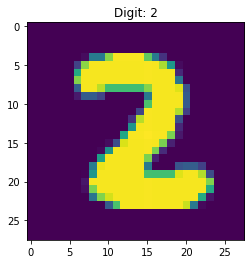

In [12]:
# Sample photo
photo = 0
showImage(Xtrain[photo], Ytrain[photo])

In [13]:
def oneHotEncode(y):
    # Target index matrix from Ytrain
    T = np.zeros((y.shape[0], np.unique(y).shape[0]))

    for i,val in enumerate(y):
        T[i,val] = 1

    return T

In [19]:
def sigmoid(z):
    return 1 / (1 + th.tensor.exp(-z))

In [20]:
def tanh(z):
    return (th.tensor.exp(z)-th.tensor.exp(-z)) / (th.tensor.exp(z)+th.tensor.exp(-z))

In [21]:
def softmax(z):
    return th.tensor.exp(z) / th.tensor.sum(np.exp(z), axis=1, keepdims=True)

In [22]:
def nonlinearDT(z, func):
    if func == "sigmoid":
        return z*(1-z)
    if func == "tanh":
        return (1-z**2)

In [54]:
def accuracy(y, yhat):
    return np.mean(y==yhat)

In [69]:
N = Xtrain.shape[0]
D = Xtrain.shape[1]
M = 100
K = 10
lr = 0.1
iterations = 5000
Ctrain = []
np.random.seed(1)

T = oneHotEncode(Ytrain)

Xm = th.tensor.matrix('Xtrain')
Ym = th.tensor.matrix('T')

W1_init = np.random.randn(D,M)
b1_init = np.random.randn(M)
W2_init = np.random.randn(M,K)
b2_init = np.random.randn(K)

W1 = th.shared(W1_init, "w1")
b1 = th.shared(b1_init, "b1")
W2 = th.shared(W2_init, "w2")
b2 = th.shared(b2_init, "b2")

Z1 = sigmoid(th.tensor.dot(Xm,W1)+b1)
Z2 = softmax(th.tensor.dot(Z1,W2)+b2)

cost = -(Ym*th.tensor.log(Z2)).mean()
predict = th.tensor.argmax(Z2, axis=1)

W1_update = W1 - lr*th.tensor.grad(cost,W1)
b1_update = b1 - lr*th.tensor.grad(cost,b1)
W2_update = W2 - lr*th.tensor.grad(cost,W2)
b2_update = b2 - lr*th.tensor.grad(cost,b2)

train = th.function(inputs=(Xm,Ym), outputs=[cost,predict], updates=[(W1,W1_update),(b1,b1_update),(W2,W2_update),(b2,b2_update)])

for i in range(iterations+1):
    c,yhat = train(Xtrain,T)
    Ctrain.append(c)
    if i%10==0:
        print("Iteration: "+ str(i)+" | Cost: "+ str(c) + " | Accuracy: " + str(accuracy(Ytrain,yhat)*100) +"%")

Iteration: 0 | Cost: 0.7720872586557195 | Accuracy: 9.679661016949153%
Iteration: 10 | Cost: 0.7418896118434228 | Accuracy: 10.220338983050848%
Iteration: 20 | Cost: 0.7180974732859242 | Accuracy: 10.627118644067798%
Iteration: 30 | Cost: 0.697831538072327 | Accuracy: 11.06271186440678%
Iteration: 40 | Cost: 0.6806551286593746 | Accuracy: 11.459322033898305%
Iteration: 50 | Cost: 0.6656363809310013 | Accuracy: 11.76271186440678%
Iteration: 60 | Cost: 0.6528483466035154 | Accuracy: 12.09322033898305%
Iteration: 70 | Cost: 0.6414124905693006 | Accuracy: 12.386440677966101%
Iteration: 80 | Cost: 0.6310858847987009 | Accuracy: 12.642372881355932%
Iteration: 90 | Cost: 0.6218593869834842 | Accuracy: 12.923728813559322%
Iteration: 100 | Cost: 0.613270526113575 | Accuracy: 13.177966101694915%
Iteration: 110 | Cost: 0.6055275665006787 | Accuracy: 13.433898305084746%
Iteration: 120 | Cost: 0.5984898253753014 | Accuracy: 13.635593220338983%
Iteration: 130 | Cost: 0.5921604374185385 | Accuracy: 1

Iteration: 1120 | Cost: 0.36489881565018645 | Accuracy: 29.528813559322032%
Iteration: 1130 | Cost: 0.3635936550268437 | Accuracy: 29.66949152542373%
Iteration: 1140 | Cost: 0.3623090436530415 | Accuracy: 29.803389830508475%
Iteration: 1150 | Cost: 0.36105754543259655 | Accuracy: 29.94406779661017%
Iteration: 1160 | Cost: 0.3598016467024059 | Accuracy: 30.079661016949157%
Iteration: 1170 | Cost: 0.3585640275337957 | Accuracy: 30.2%
Iteration: 1180 | Cost: 0.35731820450968754 | Accuracy: 30.3135593220339%
Iteration: 1190 | Cost: 0.3561035114626861 | Accuracy: 30.462711864406778%
Iteration: 1200 | Cost: 0.3549263857290702 | Accuracy: 30.61186440677966%
Iteration: 1210 | Cost: 0.3537547904707515 | Accuracy: 30.73559322033898%
Iteration: 1220 | Cost: 0.3525867605557959 | Accuracy: 30.842372881355935%
Iteration: 1230 | Cost: 0.3514189235333736 | Accuracy: 30.962711864406778%
Iteration: 1240 | Cost: 0.3502745050959132 | Accuracy: 31.05593220338983%
Iteration: 1250 | Cost: 0.3491468263303723 

Iteration: 2220 | Cost: 0.26772258273925775 | Accuracy: 41.02542372881356%
Iteration: 2230 | Cost: 0.26710816926710657 | Accuracy: 41.09830508474576%
Iteration: 2240 | Cost: 0.2664828020788958 | Accuracy: 41.167796610169496%
Iteration: 2250 | Cost: 0.2658679201004591 | Accuracy: 41.255932203389825%
Iteration: 2260 | Cost: 0.2652491999570878 | Accuracy: 41.291525423728814%
Iteration: 2270 | Cost: 0.2646321532057386 | Accuracy: 41.384745762711866%
Iteration: 2280 | Cost: 0.26401988318573955 | Accuracy: 41.4728813559322%
Iteration: 2290 | Cost: 0.2634203123896573 | Accuracy: 41.55762711864407%
Iteration: 2300 | Cost: 0.26282874908748177 | Accuracy: 41.671186440677964%
Iteration: 2310 | Cost: 0.2622434896151994 | Accuracy: 41.76271186440678%
Iteration: 2320 | Cost: 0.26165563504915834 | Accuracy: 41.827118644067795%
Iteration: 2330 | Cost: 0.2610745198024872 | Accuracy: 41.90169491525424%
Iteration: 2340 | Cost: 0.26049026888896465 | Accuracy: 41.983050847457626%
Iteration: 2350 | Cost: 0.

Iteration: 3320 | Cost: 0.2153099172659665 | Accuracy: 48.73898305084746%
Iteration: 3330 | Cost: 0.21495080067865283 | Accuracy: 48.79661016949153%
Iteration: 3340 | Cost: 0.21459429129193386 | Accuracy: 48.85593220338983%
Iteration: 3350 | Cost: 0.21423803460725138 | Accuracy: 48.898305084745765%
Iteration: 3360 | Cost: 0.21388455153646527 | Accuracy: 48.95254237288136%
Iteration: 3370 | Cost: 0.2135326361973513 | Accuracy: 49.0135593220339%
Iteration: 3380 | Cost: 0.2131778697799418 | Accuracy: 49.0728813559322%
Iteration: 3390 | Cost: 0.21282159339454573 | Accuracy: 49.11864406779661%
Iteration: 3400 | Cost: 0.2124711611521178 | Accuracy: 49.18135593220339%
Iteration: 3410 | Cost: 0.2121222680739386 | Accuracy: 49.23220338983051%
Iteration: 3420 | Cost: 0.21177270760768474 | Accuracy: 49.277966101694915%
Iteration: 3430 | Cost: 0.21142566696773102 | Accuracy: 49.32372881355932%
Iteration: 3440 | Cost: 0.21107791867729717 | Accuracy: 49.383050847457625%
Iteration: 3450 | Cost: 0.210

Iteration: 4420 | Cost: 0.18283149113160196 | Accuracy: 54.108474576271185%
Iteration: 4430 | Cost: 0.18259606118362764 | Accuracy: 54.1542372881356%
Iteration: 4440 | Cost: 0.18236158660307414 | Accuracy: 54.17796610169492%
Iteration: 4450 | Cost: 0.18212854703345757 | Accuracy: 54.215254237288136%
Iteration: 4460 | Cost: 0.18189687257370538 | Accuracy: 54.25932203389831%
Iteration: 4470 | Cost: 0.18166514618196655 | Accuracy: 54.30847457627118%
Iteration: 4480 | Cost: 0.18143406542185397 | Accuracy: 54.34576271186441%
Iteration: 4490 | Cost: 0.1812021915011346 | Accuracy: 54.3864406779661%
Iteration: 4500 | Cost: 0.1809716849029017 | Accuracy: 54.43220338983051%
Iteration: 4510 | Cost: 0.18074122444170676 | Accuracy: 54.476271186440684%
Iteration: 4520 | Cost: 0.18051335662275786 | Accuracy: 54.51525423728813%
Iteration: 4530 | Cost: 0.1802849854562382 | Accuracy: 54.56101694915254%
Iteration: 4540 | Cost: 0.18005968665335742 | Accuracy: 54.610169491525426%
Iteration: 4550 | Cost: 0.

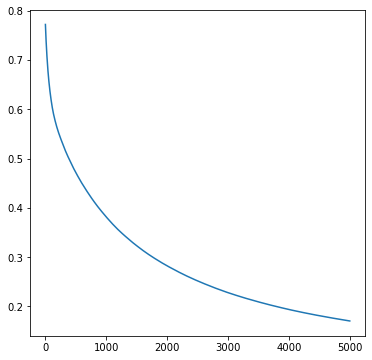

In [71]:
# Cost plot
plt.figure(figsize=(6,6))
plt.plot(Ctrain)
plt.show()